In [ ]:
# Reference: https://machinelearningmastery.com/xgboost-for-time-series-forecasting/

### Load Dataset

In [18]:
%cd "C:\Users\Angel\Documents\NUS\Y3S2\DSA3101 Data Science in Practice\DSA3101\project_backend\rain_data_full"
%pwd

C:\Users\Angel\Documents\NUS\Y3S2\DSA3101 Data Science in Practice\DSA3101\project_backend\rain_data_full


'C:\\Users\\Angel\\Documents\\NUS\\Y3S2\\DSA3101 Data Science in Practice\\DSA3101\\project_backend\\rain_data_full'

In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error

from matplotlib import pyplot
import matplotlib.dates as mdates
from tqdm.auto import tqdm

In [20]:
# Import full dataset
dataset = pd.read_csv('rain_data_2022-2023_timestamp.csv', index_col=[0])

df = dataset
df
# Remove rows with value=NaN
# df = dataset.dropna()

,timestamp,S77,S109,S90,S114,S50,S107,S215,S118,S120,...,S111,S69,S35,S36,S64,S61,S60,S102,S117,S91
0,2022-01-01T00:05:00+08:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-01T00:10:00+08:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-01T00:15:00+08:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-01-01T00:20:00+08:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-01-01T00:25:00+08:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123190,2023-03-15T23:35:00+08:00,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,NaN
123191,2023-03-15T23:40:00+08:00,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,NaN
123192,2023-03-15T23:45:00+08:00,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,NaN
123193,2023-03-15T23:50:00+08:00,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,NaN


In [21]:
# Round value of rainfall to 1 d.p.
#df['value'].round(decimals=1)
#df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
#df['time'] = pd.to_datetime(df['time']).dt.time

In [22]:
# Check datetype and first few rows
#print(df.dtypes)
df.head()

,timestamp,S77,S109,S90,S114,S50,S107,S215,S118,S120,...,S111,S69,S35,S36,S64,S61,S60,S102,S117,S91
0,2022-01-01T00:05:00+08:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-01T00:10:00+08:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-01T00:15:00+08:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-01-01T00:20:00+08:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-01-01T00:25:00+08:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Convert time series to supervised learning model

In [23]:
# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
	data: Sequence of observations as a list or NumPy array.
	n_in: Number of lag observations as input (X).
	n_out: Number of observations as output (y).
	dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
 	Pandas DataFrame of series framed for supervised learning.
 	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = pd.concat(cols, axis=1)
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg.values

In [24]:
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test, :], data[-n_test:, :]

In [25]:
# fit an xgboost model and make a one step prediction
def xgboost_forecast(train, testX):
	# transform list into array
	train = np.asarray(train)
	# split into input and output columns
	trainX, trainy = train[:, :-1], train[:, -1]
	# fit model
	model = xgb.XGBRegressor(
        objective='reg:squarederror', 
        n_estimators=1000)
        #tree_method='gpu_hist')
	model.fit(trainX, trainy)
	# make a one-step prediction
	yhat = model.predict([testX])
	return yhat[0]

In [26]:
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# split test row into input and output columns
		testX, testy = test[i, :-1], test[i, -1]
		# fit model on history and make a prediction
		yhat = xgboost_forecast(history, testX)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
		# summarize progress
		print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
	# estimate prediction error
	error = mean_absolute_error(test[:, -1], predictions)
	return error, test[:, 1], predictions, test[:, 0]

### Fitting regression model

In [27]:
df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0])
df['time_float'] = df.loc[:, 'timestamp']
df['time_float'] = mdates.date2num(df['time_float'])

df.dtypes

C:\Users\Angel\AppData\Local\Temp\ipykernel_9248\4033559735.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0])


timestamp     datetime64[ns, pytz.FixedOffset(480)]
S77                                         float64
S109                                        float64
S90                                         float64
S114                                        float64
                              ...                  
S60                                         float64
S102                                        float64
S117                                        float64
S91                                         float64
time_float                                  float64
Length: 76, dtype: object

In [28]:
df

,timestamp,S77,S109,S90,S114,S50,S107,S215,S118,S120,...,S69,S35,S36,S64,S61,S60,S102,S117,S91,time_float
0,2022-01-01 00:05:00+08:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18992.670139
1,2022-01-01 00:10:00+08:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18992.673611
2,2022-01-01 00:15:00+08:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18992.677083
3,2022-01-01 00:20:00+08:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18992.680556
4,2022-01-01 00:25:00+08:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18992.684028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123190,2023-03-15 23:35:00+08:00,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,NaN,19431.649306
123191,2023-03-15 23:40:00+08:00,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,NaN,19431.652778
123192,2023-03-15 23:45:00+08:00,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,NaN,19431.656250
123193,2023-03-15 23:50:00+08:00,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,NaN,19431.659722


In [29]:
df_sub = df.iloc[110886:,:]

  0%|          | 0/3 [00:00<?, ?it/s]C:\Users\Angel\AppData\Local\Temp\ipykernel_9248\1793455825.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stationData.iloc[:, -1] = stationData.iloc[:, -1].round(decimals = 1)


>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0,

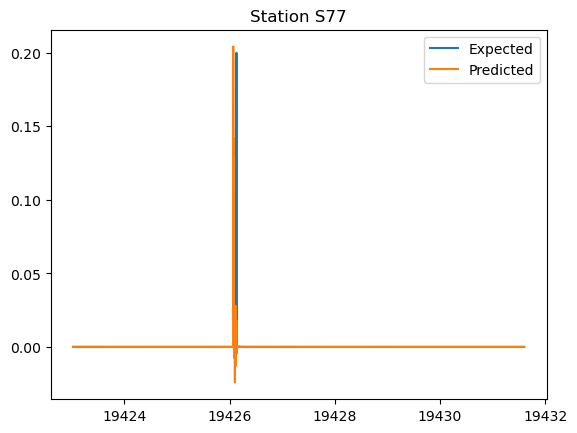

 33%|███▎      | 1/3 [3:48:21<7:36:43, 13701.67s/it]C:\Users\Angel\AppData\Local\Temp\ipykernel_9248\1793455825.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stationData.iloc[:, -1] = stationData.iloc[:, -1].round(decimals = 1)


>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0,

 33%|███▎      | 1/3 [4:10:59<8:21:58, 15059.33s/it]


KeyboardInterrupt: 

In [30]:
stations_pred_dict = {}

#for stationIndex in range(1,len(df.columns)-1):
for stationIndex in tqdm(range(1, 4)):
    # restrict dataframe to only 2 columns: timestamp, station S__
    stationData = df_sub.iloc[:, [-1, stationIndex]]
    stationData.iloc[:, -1] = stationData.iloc[:, -1].round(decimals = 1)
    # Initialise current station predictions list to dictionary
    stations_pred_dict[stationData.columns[-1]] = list()
    
    # load dataset
    values = stationData.values
    # transform the time series data into supervised learning
    data = series_to_supervised(values, n_in=12, n_out=7)
    # evaluate
    mae, y, yhat, timestamps = walk_forward_validation(data, 2462)
    print('MAE: %.3f' % mae)

    stations_pred_dict[stationData.columns[-1]] = yhat

    # plot expected vs predicted
    pyplot.plot(timestamps, y, label='Expected')
    pyplot.plot(timestamps, yhat, label='Predicted')
    pyplot.title(f"Station {stationData.columns[-1]}")
    pyplot.legend()
    pyplot.show()


In [ ]:
# load dataset
values = df.values
# transform the time series data into supervised learning
data = series_to_supervised(values, n_in=12, n_out=7)
# evaluate
mae, y, yhat = walk_forward_validation(data, 2462)
print('MAE: %.3f' % mae)
# plot expected vs predicted
pyplot.plot(y, label='Expected')
pyplot.plot(yhat, label='Predicted')
pyplot.legend()
pyplot.show()